# Descriptive Statistics with Pandas

## Importing Pandas and Define the Dataset

In [ ]:
import pandas as pd
import requests
from io import StringIO

def read_dataset_from_github(url):
    """Downloads the CSV file from GitHub and reads it into a Pandas DataFrame, skipping bad lines."""
    response = requests.get(url)
    response.raise_for_status()  # Raise an error if the request failed
    csv_data = StringIO(response.text)
    df = pd.read_csv(csv_data, sep="\t", encoding="utf-16", on_bad_lines="skip")
    df.columns = df.columns.str.strip()
    return df

# GitHub raw CSV file URL
url = "https://raw.githubusercontent.com/YitaoS/ids706_individual_project1/main/polling_place_20240514.csv"

# Using Pandas to load the data
df_pandas = read_dataset_from_github(url)

## Calculate key metrics

In [ ]:
# Descriptive statistics using Pandas
# Numeric statistics
stats_numeric_pandas = df_pandas.describe()

# Categorical statistics
stats_categorical_pandas = df_pandas.describe(include=['object'])

# Display the statistics
print("Pandas Numeric Descriptive Statistics:")
print(stats_numeric_pandas)

print("\nPandas Categorical Descriptive Statistics:")
print(stats_categorical_pandas)


Pandas Numeric Descriptive Statistics:
       polling_place_id           zip
count       2616.000000   2616.000000
mean          50.255352  27997.227829
std           52.501718    533.749997
min            1.000000  27006.000000
25%           13.000000  27534.000000
50%           32.000000  28063.000000
75%           65.000000  28455.000000
max          239.000000  28909.000000

Pandas Categorical Descriptive Statistics:
       election_dt county_name  \
count         2616        2616   
unique           1         100   
top     05/14/2024        WAKE   
freq          2616         212   

                                    polling_place_name precinct_name  \
count                                             2616          2616   
unique                                            2498          2490   
top     SAMPSON COUNTY AGRI-EXPO CENTER (CIVIC CENTER)         SALEM   
freq                                                 6             5   

            street_address       city state

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def create_save_visualization(
    df, column_name, save_filename=None, show=False, plot_type="hist", top_n=None
):
    """
    A general visualization function that creates and saves a plot.
    """
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 6))

    if plot_type == "hist":
        sns.histplot(df[column_name], kde=True, color="skyblue", bins=30)
    elif plot_type == "bar":
        if top_n:
            data = df[column_name].value_counts().head(top_n)
        else:
            data = df[column_name].value_counts()
        sns.barplot(
            x=data.index, y=data.values, palette="Blues_d", hue=data.index, legend=False
        )

        plt.xticks(rotation=45, ha="right")

    plt.title(f"{column_name} Distribution", fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    plt.show()
    if save_filename:
        plt.savefig(save_filename, bbox_inches="tight")
        plt.close()

    if show:
        plt.show()

## Visualize the Results

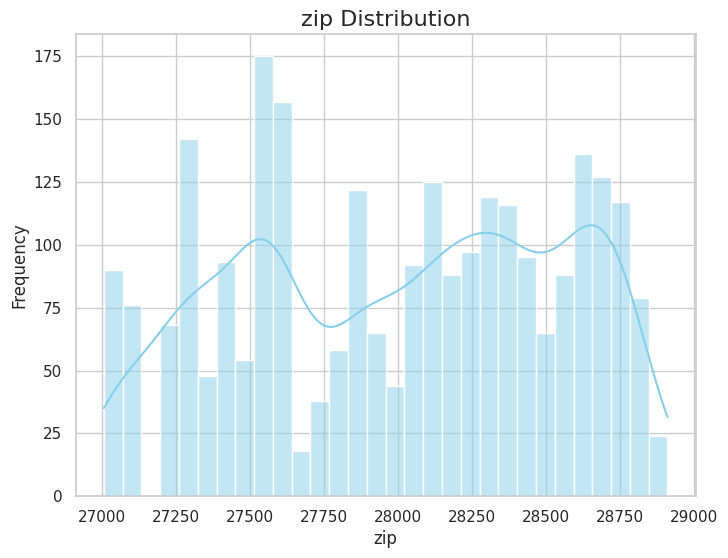

In [ ]:
import matplotlib.pyplot as plt
create_save_visualization(df_pandas, column_name='zip', save_filename="zip_histogram.png", show=True, plot_type='hist')


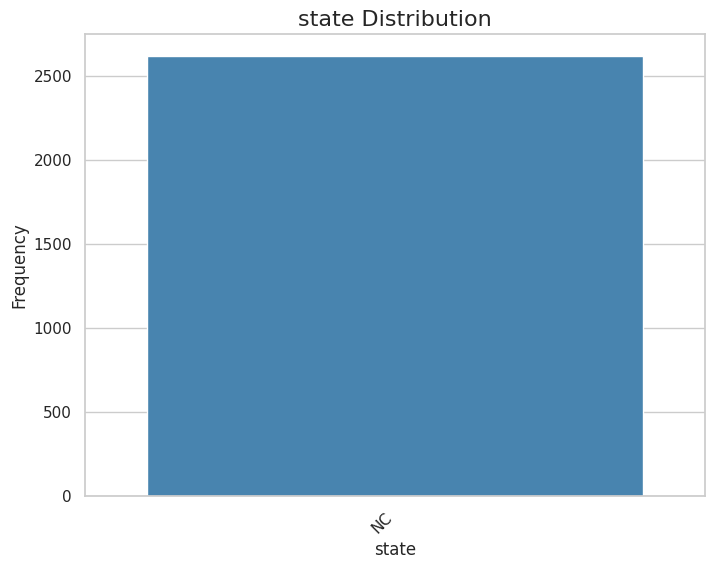

In [ ]:
create_save_visualization(df_pandas, column_name='state', save_filename="state_barplot.png", show=True, plot_type='bar')


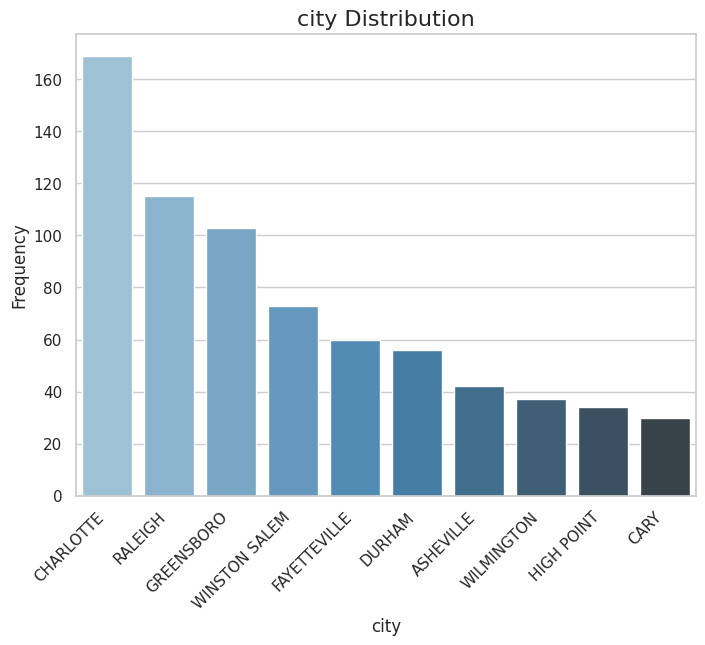

In [ ]:
create_save_visualization(df_pandas, column_name='city', save_filename="top10_city_barplot.png", show=True, plot_type='bar', top_n=10)
